# Image Recognition Analysis--Milestone Report

### The Problem

Can we utilize machine learning to correctly identify images by training on pre-labeled images that were previously labeled by a different machine?  In other words, can machines teach machines to recognize images?  

### The Client

This topic would be of interest to robotics firms to assist in robotic navigation, to law enforcement agencies (to assist in the facial recognition of suspects) or to intelligence agencies (to aid in recognizing targets of interest in aerial reconnaissance photographs).  If successful, it may obviate or reduce the need to have large numbers of human beings pre-label images in every case.  Instead, a client could save money if image recognition training could always be done based on pre-labeled images done by machines that were in turn trained by other machines that were ultimately trained on only one or two human pre-labeling sessions long ago.  
	
### The Data

The dataset was taken from the Open Images dataset available [here](https://storage.googleapis.com/openimages/web/download.html).   The full set consists of 9,178,275 images with 19,995 classes.  There is also a smaller subset of the data consisting of 1,743,042 training images with 601 classes. The data for the image labels and image id’s are available as csv files.  

### The Approach

1.	Data wrangling and cleaning—First I determined which of the machine-learned labels and id’s in the training set correspond to the training labels and id’s for the image subset given and narrowed the training set down to only those labels and id’s.  (The machine learned training set was taken from all 9,178,275 images, while the images used here will be from a more manageable subset.)  I also made certain that I narrowed the set further to only those labels that were identified with certainty by a human observer as confirmation in addition to the machine's estimate/assignment of the label so as not to introduce too much uncertainty into the present model.    
2.	Exploratory Data Analysis—Here, I briefly analyzed relationships among the variables in the dataset using both statistical functions and graphical analyses. This primarily involved an analysis of the frequencies and types of labels present in the dataset, as these were the variables most amenable to analysis.
3.	Machine Learning—I will then build a deep learning model using a convolutional neural network to identify the images.  The object will be to determine whether and to what extent one deep learning model may accurately recognize images that have been labeled by a different machine and to see how confident both machines were in the identification.
4.	Final Report—Below, I have provided a detailed report describing the procedure I used and the findings I obtained therefrom, including appropriate data visualizations, prior to submitting the data to a machine learning model.  Accompanying this report will be a slide deck providing a high level summary. All of the foregoing has been submitted and published on GitHub.

Note:  Excerpts from this report are also repeated below in the code section in the relevant areas to which they pertain. What follows immediately below is the report in its entirety.  



## Data Cleaning

I obtained the data from the Open Images Dataset V4 located [here](https://storage.googleapis.com/openimages/web/download.html).  This data consists of images and labels intended for multilabel classification.  The full set consists of 9,178,275 images with 19,995 classes.  There is also a smaller subset of the data consisting of 1,743,042 training images with 601 classes. (As demonstrated below, the number of classes given by the source website as 600 is not correct.  The csv file from which the labels and class names  were obtained is unaltered and is directly from the source site. There are no null values or duplicate values present, as shown by executing the info and duplicated methods on the dataframe read in from the source csv file.) 

In an effort to simplify the problem at hand to one of single label classification and due to inherent hardware limitations (i.e., lack of a gpu), I chose the smaller dataset with 601 classes.  However, since I also wanted to look at the initial machine confidence level in choosing these labels and compare them to what was ultimately predicted here, I also needed to use the larger dataset containing this information that was not included in the smaller dataset.  Accordingly, I merged the larger and smaller datasets on ImageID and LabelName in order to get those images and labels common to both (the smaller set being a subset of the larger set), and called it **label_train_merge**. 

I then created a dictionary for translating the label names to the Class Names given in the class_names_short dataframe.  This dictionary was then used to create a new variable 'ClassName' for the label_train_merge dataframe which gives English names for each label. 

Since there were now two Confidence columns and two Source columns as a result of the merge, one each for machine and human confidence and sources respectively, I renamed the variables accordingly as 'Confidence_Machine' and 'Confidence_Human' and Source_Machine and Source_Human.  

The Confidence_Machine variable signifies the confidence on a scale from 0 to 1 that the machine had in giving the label to the image (essentially a probability that the label predicted applied to the image).  The Confidence_Human variable is more definite and was either 0 or 1 depending on whether the human observer definitely thought the particular label applied to the image or not.  

For example, in the dataframe below, the human identified the first image listed as being definitely a building, but not a house or a tower. The machine was less certain.  While it agreed that it was a building with an 80% probability, it also predicted it to be a house with a 70% probability and a tower with a 60% probability. 

In an effort to simplify matters for machine learning purposes here so that we can have full confidence in all the labels given as our "ground truth", I limited the dataframe to only those labels with a Confidence_Human value of 1.  I then dropped any duplicate ImageID values so that the set would consist only of 1 LabelName/ClassName per ImageID for single label classification.  This resulted in a reduced dataset with 959,927 images and 512 unique ClassNames.  The dataframe was then pickled for ease of future access and was ready for further analysis.

Note:  While the Open Images source website provided additional datasets for validation and test purposes, this larger training dataset was used here for all purposes, such that the validation and test sets were carved out from it. When similar merging and reducing processes were applied to the given validation and test sets, it resulted in a different number of unique ClassNames, and this posed a problem when applying them to the machine learning algorithms used here which require the same number of labels in the training, validation and test sets for comparison.  Accordingly, since the training set is so large, even after the merging and reductions used here, I was able to later use the training data as the overall source data and carve out and isolate adequately sized validation and test sets from the rest of the data to ensure the same number of labels for all sets.

## Exploratory Data Analysis

I began by taking a count of all of the different class names present in the dataset. While there are 512 unique class names, some of these occur much more frequently than others.  As can be observed below, many of the class names are synonyms for one another, or else one term is a more general description of another ("Building" vs. "Skyscraper", "Vehicle" vs. "Car" or "Animal" vs. "Cat", for example). In other instances, one class name may refer to the part of a whole represented by another class name ("Human face" vs. "Person" or "Man", for example).  The more general terms naturally tend to have higher counts than the more specific terms.

I then chose 10 random ImageID's and corresponding ClassNames and drew the actual images by their ID's from the appropriate directory. Each of the images was plotted along with the image's shape, label, the number of times the label appears in the dataset and the probability that the machine involved in pre-labeling the image would assign that particular label for the image in question. 

As can be seen below, the images are of varying shapes. They will therefore have to be transformed into a uniform shape later in order to be analyzed properly in the neural network to be built.  

The labels represented are of varying frequencies, but generally tend to come from the more highly represented class names.  The label that appeared with the lowest frequency was "Sports equipment" at 586 instances in the dataset.  It was also predicted by the inital machine with the lowest level of confidence at 60.00%. This is understandable considering the low frequncy for this label.  Additionally, as can be observed from the image itself, the image actually consists of a pair of Star Wars-themed masks, those of Darth Vader and Boba Fett. Since the Boba Fett mask bears a passing resemblence to a hockey-type mask, it is reasonable that the previous machine might make an identification of "Sports equipment" instead.  Even other labels with a lesser frequency such as "Fish", which appears 3,831 times in the dataset, were predicted/generated with a high degree of confidence by the initial machine (90.00% in the case of the Fish). 

In other instances we see labels applied that, while perhaps very general, are nonetheless accurate. The picture of the little boy in the cowboy hat was technically identified correctly as "Clothing" since his distinctive clothing appears in the image.  (Prior to reducing the dataset to single labels per image, other perhaps more fitting labels may have been applied here as well.) This same issue is at play in the image of the toy spaceships identified as "Vehicle", as a spaceship is technically a kind of vehicle.  Finally, the image identified as "Toy", the dog in a sports uniform, is either actually a toy stuffed animal or is a person dressed as a team mascot, but the scale is not clear from this image alone, so the "Toy" label predicted at 80.00% confidence appears to be reasonably accurate. 

Therefore it appears that the initial machine confidence levels were fairly high and were reasonably good at predicting/generating labels, despite some overgeneralization. (Further, as stated above, all of these labels were also confirmed by human observers with 100% certainty by them. It just appears that one of the humans may not have been a Star Wars fan!)  

I then obtained the statistics for the label counts.  Given the large maximum compared to the third quartile and the large standard deviation of the counts (approximately 9,122), I looked at the median value of 126.5, rather than at the mean value, and found the corresponding labels that had counts of 126 and 127. "Pillow" had a count of 126 and "Kite" had a count of 127 and thus could be considered the labels/ClassNames with the median frequencies.  

I then plotted four views of the distribution of the label/ClassName data.  

First, I took the top 50 most frequent ClassNames and plotted them.  "Person" was by far the most frequent term, followed by "Tree" and "Vehicle", all fairly generic terms. As can be seen from the plot, the counts fall off fairly rapidly after the top 6-8 ClassNames, and all labels after "Bird" appear 20,000 or less times in the dataset.  

Then I took the remaining ClassNames, initially focusing on those with counts greater than 100, and then on every 250 entries in the dataset for greater clarity.  The former showed a much smoother decline in label frequencies over a wide variety of different types of labels, as also indicated by the much smaller standard deviation of 359.75.  Taking every 250th entry revealed a more choppy distribution of ClassName counts, but over a much smaller range; no count was much greater than 10.  

Finally, I plotted the bottom 50 least frequent ClassNames.  Again, none had a count much greater than 10.  The least frequent labels (at only one each) were "Cowboy hat", "Dishwasher", "Plastic bag", "Bicycle helmet", "Baseball bat" and "Carnivore", all fairly specific terms (with the possible exception of "Carnivore").  

After this analysis was concluded, the data was then ready to be prepared for machine learning.  



### Report Excerpts

## Data Cleaning

I obtained the data from the Open Images Dataset V4 located [here](https://storage.googleapis.com/openimages/web/download.html).  This data consists of images and labels intended for multilabel classification.  The full set consists of 9,178,275 images with 19,995 classes.  There is also a smaller subset of the data consisting of 1,743,042 training images with 601 classes. (As demonstrated below, the number of classes given by the source website as 600 is not correct.  The csv file from which the labels and class names  were obtained is unaltered and is directly from the source site. There are no null values or duplicate values present, as shown by executing the info and duplicated methods on the dataframe read in from the source csv file.) 

In an effort to simplify the problem at hand to one of single label classification and due to inherent hardware limitations, I chose the smaller dataset with 601 classes.  However, since I also wanted to look at the initial machine confidence level in choosing these labels and compare them to what was ultimately predicted here, I also needed to use the larger dataset containing this information that was not included in the smaller dataset.  Accordingly, I merged the larger and smaller datasets on ImageID and LabelName in order to get those images and labels common to both (the smaller set being a subset of the larger set), and called it **label_train_merge**.

In [1]:
import numpy as np
import pandas as pd

#Get and examine label datasets
labels_train = pd.read_csv('/Volumes/Backup_Chris/Projects/Image_Recognition/labels/train-annotations-machine-imagelabels.csv', index_col=False)

labels_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78977695 entries, 0 to 78977694
Data columns (total 4 columns):
ImageID       object
Source        object
LabelName     object
Confidence    float64
dtypes: float64(1), object(3)
memory usage: 2.4+ GB


In [2]:
labels_train.head()

,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,machine,/m/05_4_,0.7
1,000002b66c9c498e,machine,/m/0krfg,0.7
2,000002b66c9c498e,machine,/m/01kcnl,0.5
3,000002b97e5471a0,machine,/m/05_5t0l,0.9
4,000002b97e5471a0,machine,/m/0cgh4,0.8


In [3]:
#Load class dataset identifying labelnames with classes

class_names_short = pd.read_csv('/Volumes/Backup_Chris/Projects/Image_Recognition/labels/class-descriptions-boxable.csv', index_col=False, names=['LabelName', 'Class'], header=None, encoding='latin-1')
class_names_short.info()
class_names_short.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
LabelName    601 non-null object
Class        601 non-null object
dtypes: object(2)
memory usage: 9.5+ KB


,LabelName,Class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [4]:
#No duplicate values here or null values--601 is correct number of labels/Classes despite
# origin site stating it was 600

print(class_names_short.LabelName[class_names_short.duplicated()])
print(class_names_short.Class[class_names_short.duplicated()])


Series([], Name: LabelName, dtype: object)
Series([], Name: Class, dtype: object)


In [5]:
labels_train_short = pd.read_csv('/Volumes/Backup_Chris/Projects/Image_Recognition/labels/train-annotations-human-imagelabels-boxable.csv', index_col=False)
labels_train_short.info()
labels_train_short.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8996795 entries, 0 to 8996794
Data columns (total 4 columns):
ImageID       object
Source        object
LabelName     object
Confidence    int64
dtypes: int64(1), object(3)
memory usage: 274.6+ MB


,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,verification,/m/014j1m,0
1,000002b66c9c498e,verification,/m/014sv8,1
2,000002b66c9c498e,verification,/m/01599,0
3,000002b66c9c498e,verification,/m/015p6,0
4,000002b66c9c498e,verification,/m/015x4r,0


In [6]:
#Get labels both sets have in common

label_train_merge = pd.merge(labels_train, labels_train_short, how='inner', on=['ImageID', 'LabelName'])
label_train_merge.info()
label_train_merge.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934243 entries, 0 to 1934242
Data columns (total 6 columns):
ImageID         object
Source_x        object
LabelName       object
Confidence_x    float64
Source_y        object
Confidence_y    int64
dtypes: float64(1), int64(1), object(4)
memory usage: 103.3+ MB


,ImageID,Source_x,LabelName,Confidence_x,Source_y,Confidence_y
0,000002b97e5471a0,machine,/m/0cgh4,0.8,verification,1
1,000002b97e5471a0,machine,/m/03jm5,0.7,verification,0
2,000002b97e5471a0,machine,/m/01fdzj,0.6,verification,0
3,000002c707c9895e,machine,/m/0d4v4,0.6,verification,0
4,0000048549557964,machine,/m/0k4j,0.9,verification,1


I then created a dictionary for translating the label names to the Class Names given in the class_names_short dataframe.  This dictionary was then used to create a new variable 'ClassName' for the label_train_merge dataframe which gives English names for each label.    

In [7]:
#Create dictionary of labels and class names for training set

keys = class_names_short.LabelName
vals = class_names_short.Class


label_dict = {key:val for (key, val) in zip(keys, vals)}

list(label_dict.values())[0:4]



['Tortoise', 'Container', 'Magpie', 'Sea turtle']

In [8]:
#Create class names for labels
lab_classes = [label_dict[label_train_merge['LabelName'][i]] for i in np.arange(0, len(label_train_merge['LabelName']))]

In [9]:
lab_classes = pd.Series(lab_classes)

lab_classes.head()

0    Building
1       House
2       Tower
3      Window
4         Car
dtype: object

In [10]:
#Add ClassName column for clarity
label_train_merge['ClassName'] = lab_classes

label_train_merge.head()

,ImageID,Source_x,LabelName,Confidence_x,Source_y,Confidence_y,ClassName
0,000002b97e5471a0,machine,/m/0cgh4,0.8,verification,1,Building
1,000002b97e5471a0,machine,/m/03jm5,0.7,verification,0,House
2,000002b97e5471a0,machine,/m/01fdzj,0.6,verification,0,Tower
3,000002c707c9895e,machine,/m/0d4v4,0.6,verification,0,Window
4,0000048549557964,machine,/m/0k4j,0.9,verification,1,Car


Since there were now two Confidence columns and two Source columns as a result of the merge, one each for machine and human confidence and sources respectively, I renamed the variables accordingly as 'Confidence_Machine' and 'Confidence_Human' and Source_Machine and Source_Human.  

The Confidence_Machine variable signifies the confidence on a scale from 0 to 1 that the machine had in giving the label to the image (essentially a probability that the label predicted applied to the image).  The Confidence_Human variable is more definite and was either 0 or 1 depending on whether the human observer definitely thought the particular label applied to the image or not.  

For example, in the dataframe below, the human identified the first image listed as being definitely a building, but not a house or a tower. The machine was less certain.  While it agreed that it was a building with an 80% probability, it also predicted it to be a house with a 70% probability and a tower with a 60% probability. 

In an effort to simplify matters for machine learning purposes here so that we can have full confidence in all the labels given as our "ground truth", I limited the dataframe to only those labels with a Confidence_Human value of 1.  I then dropped any duplicate ImageID values so that the set would consist only of 1 LabelName/ClassName per ImageID for single label classification.  This resulted in a reduced dataset with 959,927 images and 512 unique ClassNames.  The dataframe was then pickled for ease of future access and was ready for further analysis.  

Note:  While the Open Images source website provided additional datasets for validation and test purposes, this larger training dataset was used here for all purposes, such that the validation and test sets were carved out from it. When similar merging and reducing processes were applied to the given validation and test sets, it resulted in a different number of unique ClassNames, and this posed a problem when applying them to the machine learning algorithms used here which require the same number of labels in the training, validation and test sets for comparison.  Accordingly, since the training set is so large, even after the merging and reductions used here, I was able to later use the training data as the overall source data and carve out and isolate adequately sized validation and test sets from the rest of the data to ensure the same number of labels for all sets.


In [11]:
#Rename _x and _y columns to indicate machine and human respectively
label_train_merge = label_train_merge.rename(index=str, columns={"Source_x": "Source_Machine", "Confidence_x": "Confidence_Machine",
                                    "Source_y": "Source_Human", "Confidence_y": "Confidence_Human"})
label_train_merge.head()



,ImageID,Source_Machine,LabelName,Confidence_Machine,Source_Human,Confidence_Human,ClassName
0,000002b97e5471a0,machine,/m/0cgh4,0.8,verification,1,Building
1,000002b97e5471a0,machine,/m/03jm5,0.7,verification,0,House
2,000002b97e5471a0,machine,/m/01fdzj,0.6,verification,0,Tower
3,000002c707c9895e,machine,/m/0d4v4,0.6,verification,0,Window
4,0000048549557964,machine,/m/0k4j,0.9,verification,1,Car


In [12]:
#Limit data to Confidence_Human = 1 (certain)

label_train_merge = label_train_merge[label_train_merge.Confidence_Human == 1]

label_train_merge = label_train_merge.reset_index(drop=True)

label_train_merge.head()



,ImageID,Source_Machine,LabelName,Confidence_Machine,Source_Human,Confidence_Human,ClassName
0,000002b97e5471a0,machine,/m/0cgh4,0.8,verification,1,Building
1,0000048549557964,machine,/m/0k4j,0.9,verification,1,Car
2,0000048549557964,machine,/m/07yv9,0.9,verification,1,Vehicle
3,000004f4400f6ec5,machine,/m/01g317,0.9,verification,1,Person
4,000004f4400f6ec5,machine,/m/04yx4,0.8,verification,1,Man


In [13]:
#Drop duplicate ImageID's 
label_train_merge.drop_duplicates(subset='ImageID', inplace=True)
label_train_merge = label_train_merge.reset_index(drop=True)
label_train_merge.head()

,ImageID,Source_Machine,LabelName,Confidence_Machine,Source_Human,Confidence_Human,ClassName
0,000002b97e5471a0,machine,/m/0cgh4,0.8,verification,1,Building
1,0000048549557964,machine,/m/0k4j,0.9,verification,1,Car
2,000004f4400f6ec5,machine,/m/01g317,0.9,verification,1,Person
3,000018acd19b4ad3,machine,/m/06msq,0.9,verification,1,Sculpture
4,00001bc2c4027449,machine,/m/07yv9,0.7,verification,1,Vehicle


In [14]:
label_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959927 entries, 0 to 959926
Data columns (total 7 columns):
ImageID               959927 non-null object
Source_Machine        959927 non-null object
LabelName             959927 non-null object
Confidence_Machine    959927 non-null float64
Source_Human          959927 non-null object
Confidence_Human      959927 non-null int64
ClassName             959927 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 51.3+ MB


In [15]:
len(label_train_merge.ClassName.unique())

512

In [61]:
import pickle

#with open('label_train_merge.pkl', 'wb') as f:
 #   pickle.dump(label_train_merge, f)
    
    

In [16]:
import pickle
import numpy as np
import pandas as pd

with open('label_train_merge.pkl', 'rb') as f: 
    label_train_merge = pickle.load(f)

label_train_merge.head()

,ImageID,Source_Machine,LabelName,Confidence_Machine,Source_Human,Confidence_Human,ClassName
0,000002b97e5471a0,machine,/m/0cgh4,0.8,verification,1,Building
1,0000048549557964,machine,/m/0k4j,0.9,verification,1,Car
2,000004f4400f6ec5,machine,/m/01g317,0.9,verification,1,Person
3,000018acd19b4ad3,machine,/m/06msq,0.9,verification,1,Sculpture
4,00001bc2c4027449,machine,/m/07yv9,0.7,verification,1,Vehicle


## Exploratory Data Analysis

I began by taking a count of all of the different class names present in the dataset. While there are 512 unique class names, some of these occur much more frequently than others.  As can be observed below, many of the class names are synonyms for one another, or else one term is a more general description of another ("Building" vs. "Skyscraper", "Vehicle" vs. "Car" or "Animal" vs. "Cat", for example). In other instances, one class name may refer to the part of a whole represented by another class name ("Human face" vs. "Person" or "Man", for example).  The more general terms naturally tend to have higher counts than the more specific terms.


In [17]:
#Show counts for each type of label

label_train_merge['ClassName'].value_counts()

Person              119310
Tree                 91007
Vehicle              76340
Food                 62492
Car                  51533
Flower               49574
Building             38098
Clothing             34966
Bird                 25170
House                21801
Human face           21324
Plant                19360
Animal               17461
Sculpture            16340
Skyscraper           15685
Dog                  15292
Poster               11213
Toy                  11075
Bicycle              10351
Cat                   9900
Furniture             9548
Boat                  9282
Drink                 9146
Window                9044
Insect                8262
Airplane              6929
Tower                 6606
Footwear              6290
Man                   5997
Guitar                5897
                     ...  
Pastry                   7
Canary                   6
Treadmill                6
Bagel                    6
Adhesive tape            6
Hair dryer               5
H

In [18]:
#Create dataframe to further examine label counts
label_total_counts = pd.DataFrame(label_train_merge['ClassName'].value_counts())
label_total_counts.columns = ['Counts']
label_total_counts['ClassName'] = label_total_counts.index
label_total_counts = label_total_counts.reset_index().drop('index', axis=1)
cols = ['ClassName', 'Counts']
label_total_counts = label_total_counts[cols]
label_total_counts.head()

,ClassName,Counts
0,Person,119310
1,Tree,91007
2,Vehicle,76340
3,Food,62492
4,Car,51533


I then chose 10 random ImageID's and corresponding ClassNames and drew the actual images by their ID's from the appropriate directory. Each of the images was plotted along with the image's shape, label, the number of times the label appears in the dataset and the probability that the machine involved in pre-labeling the image would assign that particular label for the image in question. 

In [19]:
#Get random indices to get random images and labels
np.random.seed(42)
indices = np.random.randint(0, len(label_train_merge), size=10)
label_train_merge.iloc[indices[:]][['ImageID', 'ClassName']]

,ImageID,ClassName
121958,176dbd6bfaf2ddd3,Fish
671155,ac72cd0f1bff8bec,Flower
131932,19f05a865246a833,Clothing
365838,57ca72a05193d073,Skyscraper
259178,3af18774ba765c92,Vehicle
644167,a4e507f302e01783,Sports equipment
110268,149b1de9cc73d57e,Toy
732180,bd79a8accea469e2,Person
54886,083550bad44b6f4b,Bicycle
137337,1b4670b00246a61d,Flower


In [20]:
#Load training images into array for examination of random samples
from skimage.data import imread
import os

ROOT_PATH = "/Volumes/Backup_Chris/Projects/Image_Recognition/"
train_data_dir = os.path.join(ROOT_PATH, "train")

def load_data(data_dir):
    if os.path.isdir(data_dir):
        
        # Loop through the directory and collect the data in
        # a list of images. Get 10 random images
        images = []
        if data_dir == train_data_dir:
            for f in label_train_merge.iloc[indices[:]]['ImageID']:
                f = os.path.join(data_dir, f) + '.jpg'
                images.append(imread(f))
            
        return images



In [21]:
#Use same indices to pull labels associated with random images

rand_label = label_train_merge.iloc[indices[:]]['ClassName']

rand_label.values

array(['Fish', 'Flower', 'Clothing', 'Skyscraper', 'Vehicle',
       'Sports equipment', 'Toy', 'Person', 'Bicycle', 'Flower'],
      dtype=object)

In [22]:
#Load image samples
images_samples = load_data(train_data_dir)

#Convert images list to numpy array
images_samples = np.array(images_samples)

len(images_samples)

10

As can be seen below, the images are of varying shapes. They will therefore have to be transformed into a uniform shape later in order to be analyzed properly in the neural network to be built.  

The labels represented are of varying frequencies, but generally tend to come from the more highly represented class names.  The label that appeared with the lowest frequency was "Sports equipment" at 586 instances in the dataset.  It was also predicted by the inital machine with the lowest level of confidence at 60.00%. This is understandable considering the low frequncy for this label.  Additionally, as can be observed from the image itself, the image actually consists of a pair of Star Wars-themed masks, those of Darth Vader and Boba Fett. Since the Boba Fett mask bears a passing resemblence to a hockey-type mask, it is reasonable that the previous machine might make an identification of "Sports equipment" instead.  Even other labels with a lesser frequency such as "Fish", which appears 3,831 times in the dataset, were predicted/generated with a high degree of confidence by the initial machine (90.00% in the case of the Fish).  

In other instances we see labels applied that, while perhaps very general, are nonetheless accurate. The picture of the little boy in the cowboy hat was technically identified correctly as "Clothing" since his distinctive clothing appears in the image.  (Prior to reducing the dataset to single labels per image, other perhaps more fitting labels may have been applied here as well.) This same issue is at play in the image of the toy spaceships identified as "Vehicle", as a spaceship is technically a kind of vehicle.  Finally, the image identified as "Toy", the dog in a sports uniform, is either actually a toy stuffed animal or is a person dressed as a team mascot, but the scale is not clear from this image alone, so the "Toy" label predicted at 80.00% confidence appears to be reasonably accurate. 

Therefore it appears that the initial machine confidence levels were fairly high and were reasonably good at predicting/generating labels, despite some overgeneralization. (Further, as stated above, all of these labels were also confirmed by human observers with 100% certainty by them. It just appears that one of the humans may not have been a Star Wars fan!)  

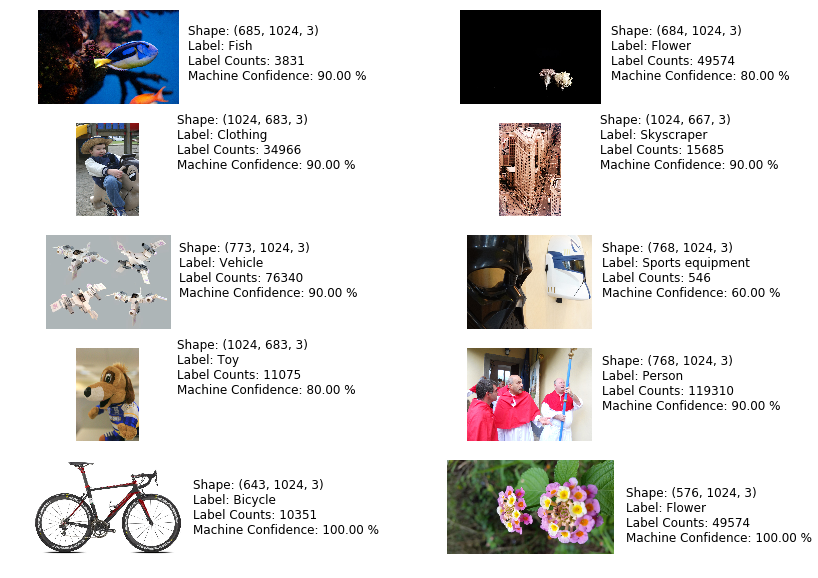

In [23]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 10))

for i in range(0, 10):
    plt.subplot(5, 2,1+i)
    plt.subplots_adjust(right=1.2)
    _ = plt.axis('off')
    rand_label_counts = label_total_counts[label_total_counts['ClassName'] == rand_label.values[i]]['Counts'].values
    machine_estimate = label_train_merge.iloc[indices[:]]['Confidence_Machine'].values * 100
    _ = plt.text(1100, 500, "Shape: {0}\nLabel: {1}\nLabel Counts: {2}\nMachine Confidence: {3:.2f} %".format(images_samples[i].shape, rand_label.values[i], rand_label_counts[0], machine_estimate[i]), 
             fontsize=12)
    _ = plt.imshow(images_samples[i])
    
plt.show()

I then obtained the statistics for the label counts.  Given the large maximum compared to the third quartile and the large standard deviation of the counts (approximately 9,122), I looked at the median value of 126.5, rather than at the mean value, and found the corresponding labels that had counts of 126 and 127. "Pillow" had a count of 126 and "Kite" had a count of 127 and thus could be considered the labels/ClassNames with the median frequencies.  

In [24]:
#Get statistics of label counts--large standard deviation and max compared to upper quartile
label_total_counts.describe()

,Counts
count,512.000000
mean,1874.857422
std,9122.328429
min,1.000000
25%,34.750000
50%,126.500000
75%,460.500000
max,119310.000000


In [25]:
#Labels Kite and Pillow both have approximately median counts
label_total_counts[(label_total_counts['Counts'] == 126) | (label_total_counts['Counts'] == 127)]

,ClassName,Counts
255,Kite,127
256,Pillow,126


I then plotted four views of the distribution of the label/ClassName data.  

First, I took the top 50 most frequent ClassNames and plotted them.  "Person" was by far the most frequent term, followed by "Tree" and "Vehicle", all fairly generic terms. As can be seen from the plot, the counts fall off fairly rapidly after the top 6-8 ClassNames, and all labels after "Bird" appear 20,000 or less times in the dataset.  

Then I took the remaining ClassNames, initially focusing on those with counts greater than 100, and then on every 250 entries in the dataset for greater clarity.  The former showed a much smoother decline in label frequencies over a wide variety of different types of labels, as also indicated by the much smaller standard deviation of 359.75.  Taking every 250th entry revealed a more choppy distribution of ClassName counts, but over a much smaller range; no count was much greater than 10.  

Finally, I plotted the bottom 50 least frequent ClassNames.  Again, none had a count much greater than 10.  The least frequent labels (at only one each) were "Cowboy hat", "Dishwasher", "Plastic bag", "Bicycle helmet", "Baseball bat" and "Carnivore", all fairly specific terms (with the possible exception of "Carnivore").  

After this analysis was concluded, I then prepared the data for machine learning.  

In [26]:
#Count numbers of each type of label--show top 50 only

top_labels = label_train_merge['ClassName'].value_counts()[0:50]

top_labels = top_labels.reset_index()

top_labels.columns = ['ClassName', 'Counts']

top_labels

,ClassName,Counts
0,Person,119310
1,Tree,91007
2,Vehicle,76340
3,Food,62492
4,Car,51533
5,Flower,49574
6,Building,38098
7,Clothing,34966
8,Bird,25170
9,House,21801


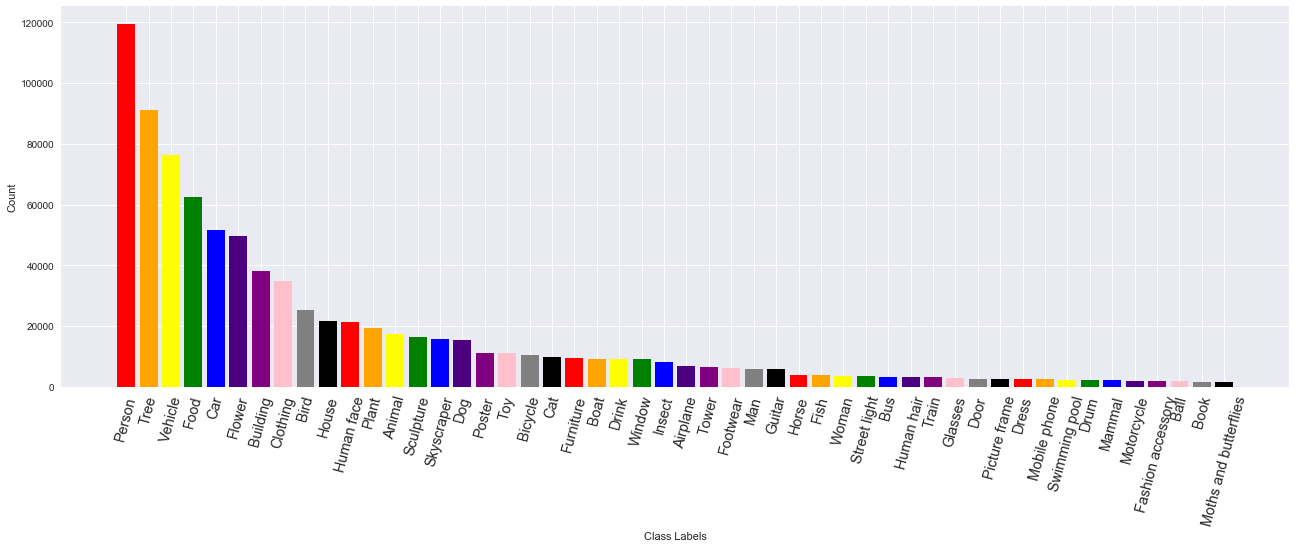

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

#Plot counts for 50 most common labels

sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(22,7)
ax.set_xlabel('Class Labels')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=75, labelsize='large')
ax.set_xticklabels(top_labels['ClassName'])
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'pink','gray', 'black']
plt.bar(top_labels['ClassName'], top_labels['Counts'], color=colors)

plt.show()

In [28]:
#Create mask of top label names and exclude from the rest to get the remainder

mask = [i for i in top_labels['ClassName']]
label_others = label_train_merge[~label_train_merge['ClassName'].isin(mask)]['ClassName']
label_others = pd.DataFrame(label_others, columns=['ClassName'])

#Confirm that remainder has proper amount--it is: 512-50=462
len(label_others['ClassName'].unique())

462

In [29]:
#Create dataframe of label counts for remaining labels for further examination
label_others['ClassName'].value_counts()
label_others_counts = pd.DataFrame(label_others['ClassName'].value_counts())
label_others_counts.columns = ['Counts']
label_others_counts['ClassName'] = label_others_counts.index
label_others_counts = label_others_counts.reset_index().drop('index', axis=1)
cols = ['ClassName', 'Counts']
label_others_counts = label_others_counts[cols]
label_others_counts.head()

,ClassName,Counts
0,Camera,1682
1,Aircraft,1645
2,Musical instrument,1556
3,Wheel,1544
4,Flag,1476


In [30]:
#Restrict label_others_counts for graphing purposes to counts greater than 100

other_labels = label_others_counts[label_others_counts['Counts'] > 100]
other_labels.describe()

,Counts
count,234.000000
mean,439.717949
std,359.754013
min,101.000000
25%,170.000000
50%,310.500000
75%,544.750000
max,1682.000000


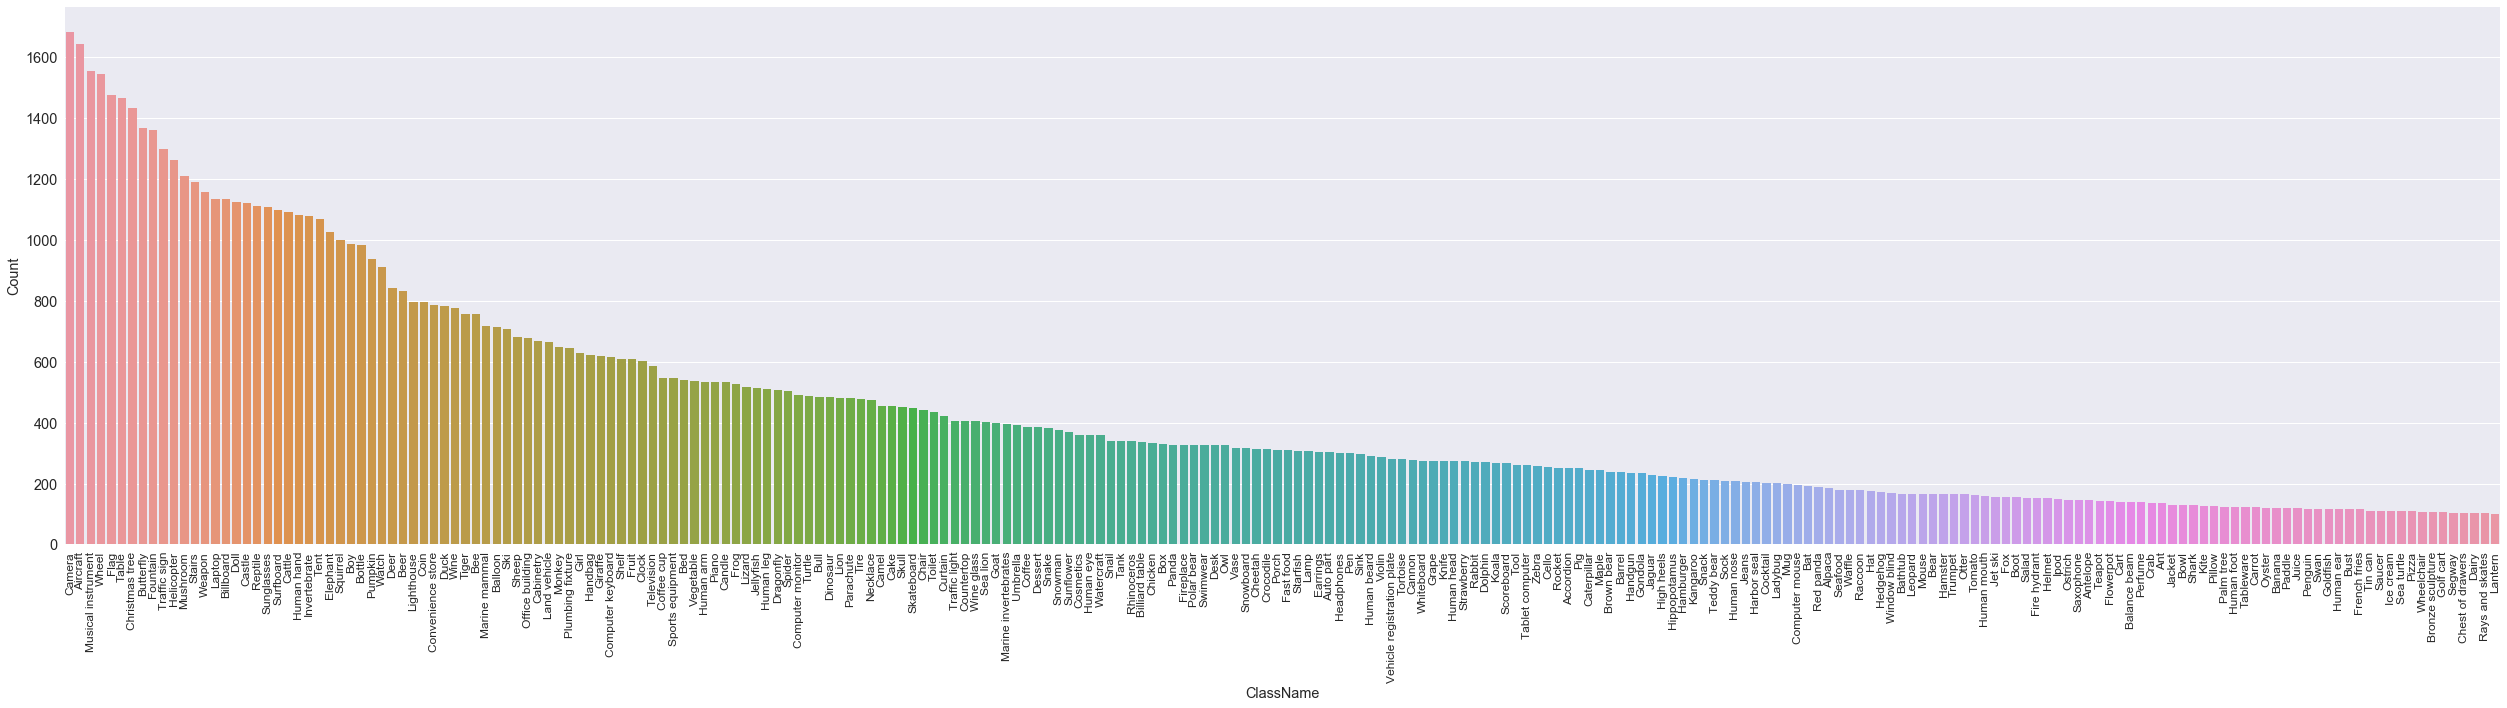

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

#Plot sample of counts for remaining labels, with greater than 100 instances each

sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(35, 10)
ax.xaxis.set_tick_params(rotation=90, labelsize=12)
sns.barplot(x='ClassName', y='Counts', data=other_labels)
ax.set_ylabel('Count', size='large')
ax.yaxis.set_tick_params(labelsize='large')
ax.set_xlabel('ClassName', size='large')
plt.tight_layout()
plt.show()



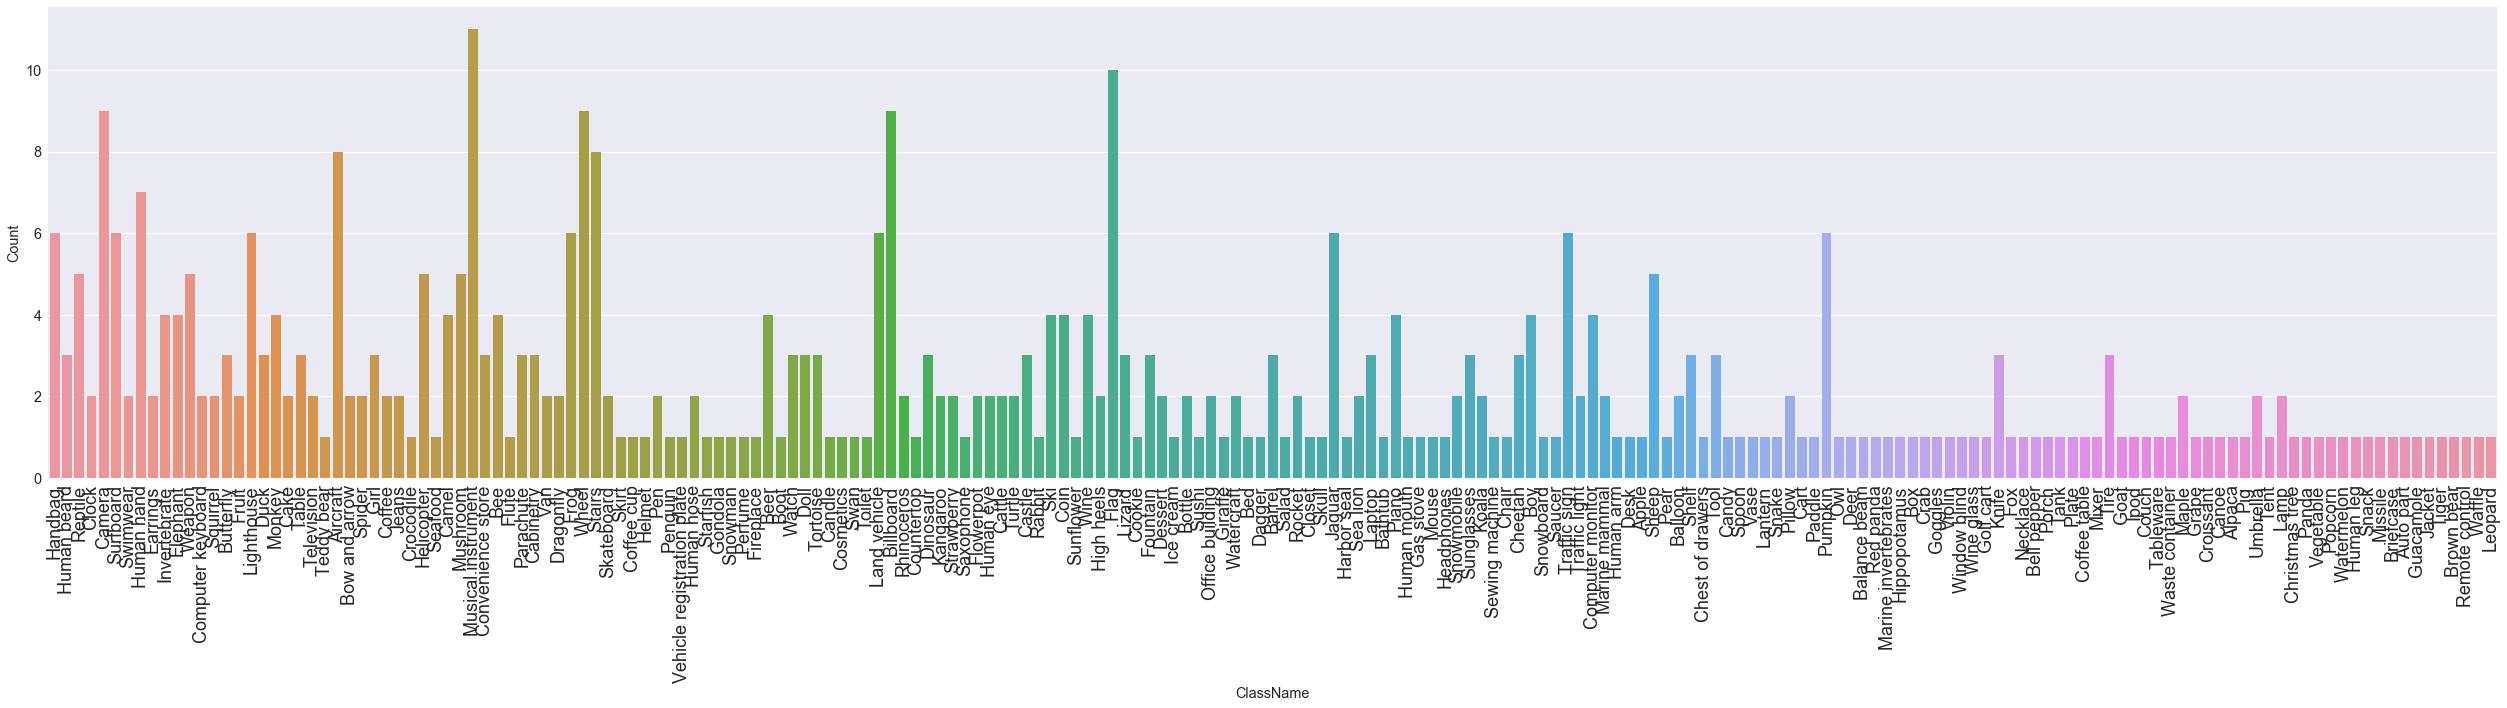

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns

#Plot sample of counts for remaining labels, taking every 250 entries for greater readability

sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(35, 10)
ax.xaxis.set_tick_params(rotation=90, labelsize=18)
sns.countplot(x='ClassName', data=label_others.iloc[::250])
ax.set_ylabel('Count', size='large')
ax.yaxis.set_tick_params(labelsize='large')
ax.set_xlabel('ClassName', size='large')
plt.tight_layout()
plt.show()


In [33]:
#Count numbers of each type of label--show lowest 50 only

bottom_labels = label_train_merge['ClassName'].value_counts()[-50:]

bottom_labels = bottom_labels.reset_index()

bottom_labels.columns = ['ClassName', 'Counts']

bottom_labels

,ClassName,Counts
0,Chainsaw,11
1,Armadillo,10
2,Towel,10
3,Envelope,10
4,Unicycle,10
5,Toothbrush,10
6,Tart,10
7,Drill,10
8,Frying pan,9
9,Wok,9


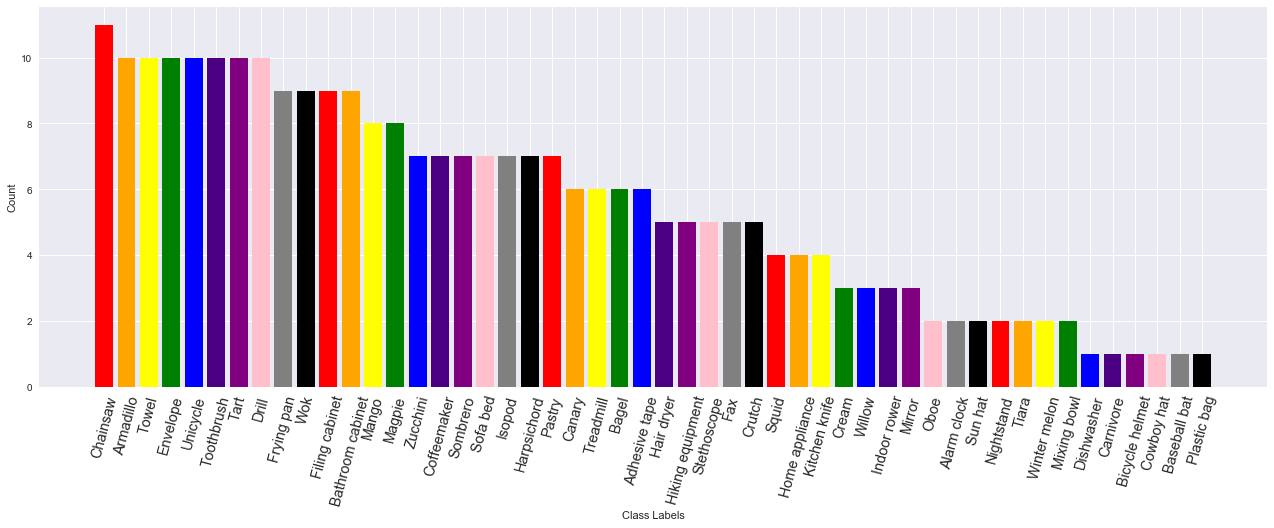

In [34]:
#Plot counts for 50 least common labels

sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(22, 7)
ax.set_xlabel('Class Labels')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=75, labelsize='large')
ax.set_xticklabels(bottom_labels['ClassName'])
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'pink','gray', 'black']
plt.bar(bottom_labels['ClassName'], bottom_labels['Counts'], color=colors)

plt.show()

After this analysis was concluded, I then prepared the data for machine learning.  